# Titanic survival prediction

## Getting started
1. Join the competition
2. Data
3. Evironment
4. More

### Data

1. train.csv - 891 passenger details.
- 'Survived' column = 1 for yes, 0 for no.
2. test.csv - 418 passengers
- prediction for the these will determine the score
- These passengers don't have the survived column's info.
3. gender_submission.csv - example of submission
- 'PassengerID' column of passeneger's id
- 'Survived' column with the prediction of survival. 



In [2]:
# Importing libraries

import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

## Preprocessing
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

## Models 
from sklearn.linear_model import LogisticRegression

# The three files for the competition
import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

/kaggle/input/titanic/train.csv
/kaggle/input/titanic/test.csv
/kaggle/input/titanic/gender_submission.csv


In [3]:
# Importing the data
train_data = pd.read_csv('/kaggle/input/titanic/train.csv')
train_data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [4]:
# Loading test data
test_data = pd.read_csv('/kaggle/input/titanic/test.csv')
test_data.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


### Sample submission
submission file in gender_submission.csv assumes that all female passengers survived

In [5]:
women = train_data.loc[train_data.Sex =='female']['Survived']
rate_women = sum(women)/len(women)
print('Percent of women who survivide:',rate_women)

Percent of women who survivide: 0.7420382165605095


In [6]:
men = train_data[train_data.Sex=='male']['Survived']
men_rate = sum(men)/len(men)
print('precent of men who survived:', men_rate)

precent of men who survived: 0.18890814558058924


## Sample Random forest model 
In the following code cells, a sample classification model will be built using the Random Forest method. 

In [7]:
from sklearn.ensemble import RandomForestClassifier

y = train_data["Survived"]

features = ["Pclass", "Sex", "SibSp", "Parch"]
X = pd.get_dummies(train_data[features])
X_test = pd.get_dummies(test_data[features])

model = RandomForestClassifier(n_estimators=100, max_depth=5, random_state=1)
model.fit(X, y)
predictions = model.predict(X_test)


In [8]:
predictions[np.arange(0,15)]

array([0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1])

In [9]:
# Generating the output
output = pd.DataFrame({'PassengerId': test_data.PassengerId, 'Survived': predictions})
output.to_csv('submission.csv', index=False)
print('submission saved')

submission saved


In [10]:
# Current directory function.
def current_dir():
    """
    A function to get the list of files in the input directory.
    """
    for dirname, _, filenames in os.walk('/kaggle/input'):
        for filename in filenames:
            print(os.path.join(dirname, filename))
            
current_dir()

/kaggle/input/titanic/train.csv
/kaggle/input/titanic/test.csv
/kaggle/input/titanic/gender_submission.csv


### Output and Submission

Ensure that the "Save and Run All" option is selected, and then click on the "Save" button.
    This generates a window in the bottom left corner of the notebook. After it has finished running, click on the number to the right of the "Save Version" button. This pulls up a list of versions on the right of the screen. Click on the ellipsis (...) to the right of the most recent version, and select Open in Viewer.
    Click on the Data tab on the top of the screen. Then, click on the "Submit" button to submit your results.

1. Ensure that the "Save and Run All" option is selected, and then click on the "Save" button.
2. This generates a window in the bottom left corner of the notebook. After it has finished running, click on the number to the right of the "Save Version" button. This pulls up a list of versions on the right of the screen. Click on the ellipsis (...) to the right of the most recent version, and select Open in Viewer.
3. Click on the Data tab on the top of the screen. Then, click on the "Submit" button to submit your results.
4. Alterantively once the file has been opened in the viewer, the output section below will contain the output file
.
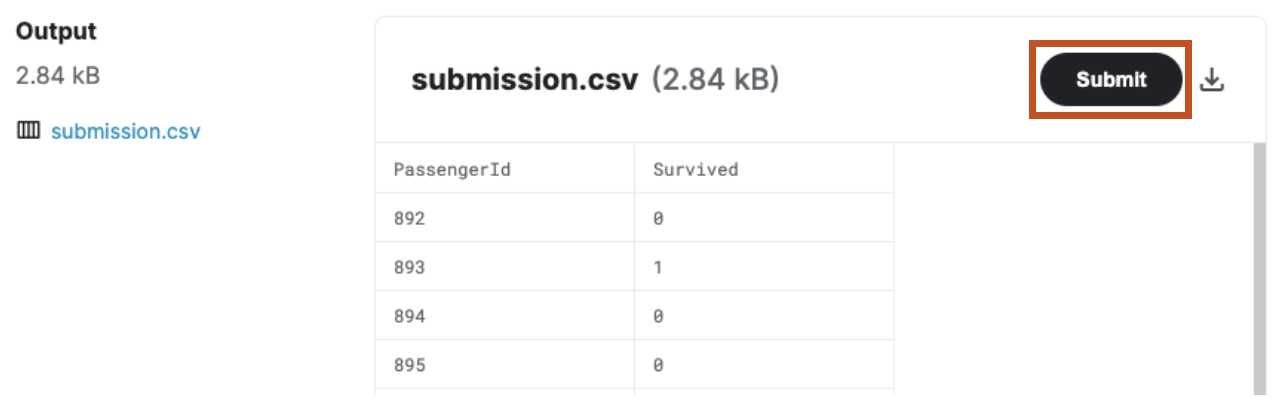

## New Model

In [11]:
train_data = pd.read_csv('/kaggle/input/titanic/train.csv')
print(train_data.shape)
train_data.describe()

(891, 12)


,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [12]:
# Splitting into features X and label y
X = train_data.drop(columns=['Survived'])
y = train_data['Survived']        ## Generated as an array

print(X.shape,
      train_data.shape,
      len(y))

(891, 11) (891, 12) 891


In [13]:
y_new = train_data.Survived
y_new = pd.DataFrame(y_new)

### Logistic Regression model
Below we will create a basic logistic regression model to generate baseline metrics.


In [14]:
## Separating the columns

col_types = X.dtypes


In [15]:
num_cols = X.select_dtypes(exclude=['object'])
obj_cols = X.select_dtypes(include=['object'])


In [16]:
# Handiling NaNs
num_cols.Age = num_cols.Age.fillna(num_cols.Age.median())
num_cols.isnull().sum()

PassengerId    0
Pclass         0
Age            0
SibSp          0
Parch          0
Fare           0
dtype: int64

In [32]:
# defining a function to get accuracy 
def get_accuracy(X, y):
    
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state=42)
    model = LogisticRegression()
    model.fit(X_train, y_train)
    preds = model.predict(X_test)
    accuracy = accuracy_score(preds, y_test)
    return accuracy

## Getting initial accuracy with only raw numercial columns
get_accuracy(num_cols, y)

0.7318435754189944

In [69]:
## Categorical columns

obj_cols = X.select_dtypes(include=['object'])
# Dropping name
obj_cols = obj_cols.drop(columns=['Name'])
obj_cols.head()

fin_data = num_cols
fin_data[['Sex', 'Embarked']] = obj_cols[['Sex','Embarked']]
fin_data.isnull().sum()
fin_data.Embarked.isnull = fin_data.Embarked.median()

TypeError: could not convert string to float: 'S'